In [ ]:
pip install dtaidistance frechetdist scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from scipy.spatial.distance import euclidean
from dtaidistance import dtw
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from scipy.signal import argrelextrema
from frechetdist import frdist  # Fréchet Distance Library
from scipy.signal import find_peaks


In [ ]:
ticker = ['TECHM.NS', 'M&M.NS', 'WIPRO.NS', 'SBIN.NS', 'BAJFINANCE.NS',
    'INFY.NS', 'KOTAKBANK.NS', 'TRENT.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS',
    'ADANIPORTS.NS', 'TATAMOTORS.NS', 'AXISBANK.NS', 'COALINDIA.NS', 'HCLTECH.NS',
    'BRITANNIA.NS', 'ICICIBANK.NS', 'LT.NS', 'CIPLA.NS', 'NTPC.NS',
    'BHARTIARTL.NS', 'NESTLEIND.NS', 'TATACONSUM.NS', 'HEROMOTOCO.NS', 'APOLLOHOSP.NS',
    'BEL.NS', 'HDFCBANK.NS', 'HINDALCO.NS', 'TCS.NS', 'SBILIFE.NS',
    'POWERGRID.NS', 'ULTRACEMCO.NS', 'ADANIENT.NS', 'HDFCLIFE.NS', 'GRASIM.NS',
    'ITC.NS', 'DRREDDY.NS', 'RELIANCE.NS', 'ONGC.NS', 'JSWSTEEL.NS',
    'EICHERMOT.NS', 'TITAN.NS', 'SUNPHARMA.NS', 'INDUSINDBK.NS', 'BPCL.NS',
    'MARUTI.NS', 'TATASTEEL.NS', 'BAJAJ-AUTO.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS']

In [ ]:
dtw_arima = []
dtw_lstm = []
mda_lstm, mda_arima = [], []
ccc_lstm, ccc_arima = [], []
spa_lstm, spa_arima = [], []
hr_lstm, hr_arima = [],[]
tpc_lstm = []
tpc_arima = []
frechet_lstm, frechet_arima = [],[]  # Fréchet Distance
sbd_lstm, sbd_arima = [],[]  # Shape-Based Distance (SBD)

In [ ]:
# Helper functions for indicators
def mean_directional_accuracy(actual, forecast):
    return np.mean(np.sign(np.diff(actual)) == np.sign(np.diff(forecast)))

def concordance_correlation_coefficient(x, y):
    return pearsonr(x, y)[0]

def sign_prediction_accuracy(actual, forecast):
    return np.mean(np.sign(actual) == np.sign(forecast))

def hit_rate(actual, forecast):
    return np.mean(np.sign(np.diff(actual)) == np.sign(np.diff(forecast)))

def turning_point_count(series):
    """
    Calculate the number of turning points (local maxima and minima) in a series.
    """
    series = np.array(series)
    max_turns = argrelextrema(series, np.greater)[0]
    min_turns = argrelextrema(series, np.less)[0]
    return len(max_turns) + len(min_turns)

def shape_based_distance(x, y):
    """
    Calculate Shape-Based Distance (SBD) between two time series.
    """
    x, y = np.array(x), np.array(y)
    n = len(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    sbd_numerator = np.sum((x - mean_x) * (y - mean_y))
    sbd_denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    return 1 - (sbd_numerator / sbd_denominator)  # SBD: Lower is better

def transform_to_2d(series):
    """
    Transform a 1D time series into a 2D array for Fréchet distance calculation.
    Adds a second dimension, which is the index or time step.
    """
    return np.array([[i, value] for i, value in enumerate(series)])

In [ ]:
for company in ticker:
  data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/{company}.csv')
  actual = data['Actual Price'].to_list()
  lstm = data['LSTM Forecast'].to_list()
  arima = data['ARIMA Forecast'].to_list()

  distancelstm = dtw.distance(actual, lstm)
  distancearima = dtw.distance(actual, arima)

  dtw_lstm.append(distancelstm)
  dtw_arima.append(distancearima)

  print(f'for {company} Distance for LSTM is {distancelstm} and for ARIMA is {distancearima}')
  print(f'Process for {company} is completed')

for TECHM.NS Distance for LSTM is 1.175652013605847 and for ARIMA is 1.7273085121487617
Process for TECHM.NS is completed
for M&M.NS Distance for LSTM is 1.8121601890866212 and for ARIMA is 5.658448435954598
Process for M&M.NS is completed
for WIPRO.NS Distance for LSTM is 0.9764376862227094 and for ARIMA is 3.078354661061755
Process for WIPRO.NS is completed
for SBIN.NS Distance for LSTM is 1.116764787580251 and for ARIMA is 4.1763277200954425
Process for SBIN.NS is completed
for BAJFINANCE.NS Distance for LSTM is 1.7623941295545462 and for ARIMA is 3.0138188660581124
Process for BAJFINANCE.NS is completed
for INFY.NS Distance for LSTM is 1.855697032241617 and for ARIMA is 0.9596199551007701
Process for INFY.NS is completed
for KOTAKBANK.NS Distance for LSTM is 1.6060631917432788 and for ARIMA is 5.666658077018131
Process for KOTAKBANK.NS is completed
for TRENT.NS Distance for LSTM is 3.6635763438201954 and for ARIMA is 0.8783487692018223
Process for TRENT.NS is completed
for BAJAJFIN

In [ ]:
dtw_data = {'Ticker': ticker, 'DTW_LSTM': dtw_lstm, 'DTW_ARIMA': dtw_arima}

In [ ]:
dtw_data = pd.DataFrame(dtw_data)

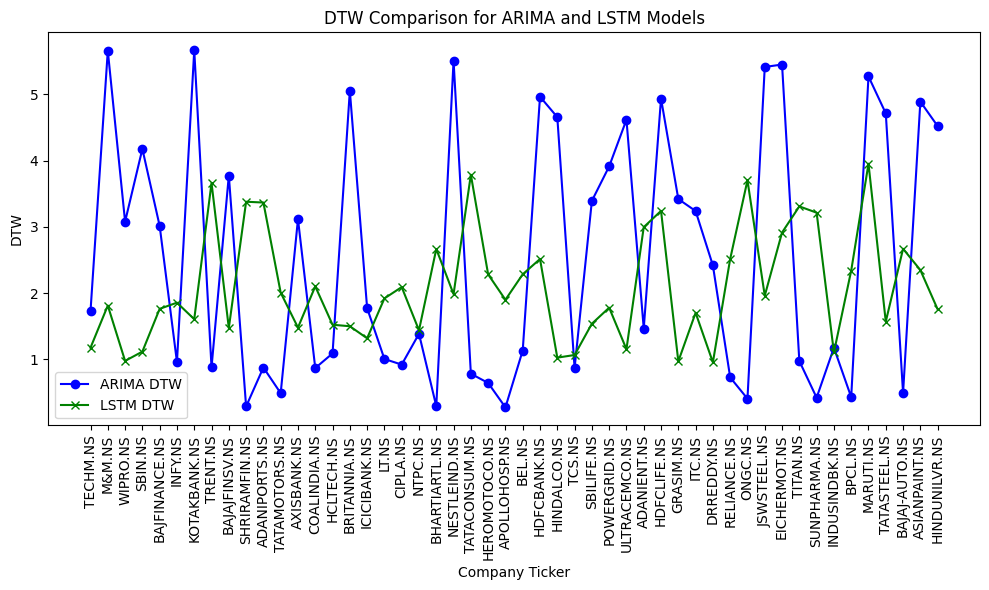

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ticker, dtw_arima, label='ARIMA DTW', marker='o', color='blue')
plt.plot(ticker, dtw_lstm, label='LSTM DTW', marker='x', color='green')
plt.xlabel('Company Ticker')
plt.ylabel('DTW')
plt.title('DTW Comparison for ARIMA and LSTM Models')
plt.xticks(rotation=90)  # Rotate ticker labels for better readability
plt.legend()
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/DTW.png', format='png', dpi=300)

In [ ]:
dtw_data.to_csv('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/dtw_values.csv', index=False)

In [ ]:
# Iterate over tickers and calculate indicators
for company in ticker:
    data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/{company}.csv')
    actual = data['Actual Price'].to_list()
    lstm = data['LSTM Forecast'].to_list()
    arima = data['ARIMA Forecast'].to_list()

    # Calculate indicators
    mda_lstm.append(mean_directional_accuracy(actual, lstm))
    mda_arima.append(mean_directional_accuracy(actual, arima))

    ccc_lstm.append(concordance_correlation_coefficient(actual, lstm))
    ccc_arima.append(concordance_correlation_coefficient(actual, arima))

    spa_lstm.append(sign_prediction_accuracy(actual, lstm))
    spa_arima.append(sign_prediction_accuracy(actual, arima))

    hr_lstm.append(hit_rate(actual, lstm))
    hr_arima.append(hit_rate(actual, arima))

    tpc_lstm.append(turning_point_count(lstm))
    tpc_arima.append(turning_point_count(arima))

    # Transform to 2D for Fréchet Distance calculation
    actual_2d = transform_to_2d(actual)
    lstm_2d = transform_to_2d(lstm)
    arima_2d = transform_to_2d(arima)

    # Calculate Fréchet Distance
    frechet_lstm.append(frdist(actual_2d, lstm_2d))
    frechet_arima.append(frdist(actual_2d, arima_2d))

    # Calculate Shape-Based Distance
    sbd_lstm.append(shape_based_distance(actual, lstm))
    sbd_arima.append(shape_based_distance(actual, arima))

    print(f'for {company} - MDA: LSTM={mda_lstm[-1]}, ARIMA={mda_arima[-1]}')
    print(f'for {company} - CCC: LSTM={ccc_lstm[-1]}, ARIMA={ccc_arima[-1]}')
    print(f'for {company} - SPA: LSTM={spa_lstm[-1]}, ARIMA={spa_arima[-1]}')
    print(f'for {company} - HR: LSTM={hr_lstm[-1]}, ARIMA={hr_arima[-1]}')
    print(f'for {company} - TPC: LSTM={tpc_lstm[-1]}, ARIMA={tpc_arima[-1]}')
    print(f'Process for {company} is completed')


for TECHM.NS - MDA: LSTM=0.5263157894736842, ARIMA=0.631578947368421
for TECHM.NS - CCC: LSTM=0.6543202845747487, ARIMA=0.6924230811011928
for TECHM.NS - SPA: LSTM=0.7, ARIMA=0.6
for TECHM.NS - HR: LSTM=0.5263157894736842, ARIMA=0.631578947368421
for TECHM.NS - TPC: LSTM=2, ARIMA=0
Process for TECHM.NS is completed
for M&M.NS - MDA: LSTM=0.5263157894736842, ARIMA=0.42105263157894735
for M&M.NS - CCC: LSTM=0.18426557243008485, ARIMA=-0.5806357481084865
for M&M.NS - SPA: LSTM=0.75, ARIMA=0.05
for M&M.NS - HR: LSTM=0.5263157894736842, ARIMA=0.42105263157894735
for M&M.NS - TPC: LSTM=1, ARIMA=2
Process for M&M.NS is completed
for WIPRO.NS - MDA: LSTM=0.5263157894736842, ARIMA=0.3684210526315789
for WIPRO.NS - CCC: LSTM=0.4676694245296406, ARIMA=0.40277754365691965
for WIPRO.NS - SPA: LSTM=0.7, ARIMA=0.35
for WIPRO.NS - HR: LSTM=0.5263157894736842, ARIMA=0.3684210526315789
for WIPRO.NS - TPC: LSTM=1, ARIMA=12
Process for WIPRO.NS is completed
for SBIN.NS - MDA: LSTM=0.6842105263157895, ARIM

In [ ]:
# Create a dictionary and convert it into a DataFrame
indicator_data = {'Ticker': ticker,
                  'MDA_LSTM': mda_lstm, 'MDA_ARIMA': mda_arima,
                  'CCC_LSTM': ccc_lstm, 'CCC_ARIMA': ccc_arima,
                  'SPA_LSTM': spa_lstm, 'SPA_ARIMA': spa_arima,
                  'HR_LSTM': hr_lstm, 'HR_ARIMA': hr_arima,
                  'TPC_LSTM': tpc_lstm, 'TPC_ARIMA': tpc_arima,
                  'Fréchet_LSTM': frechet_lstm, 'Fréchet_ARIMA': frechet_arima,
                  'SBD_LSTM': sbd_lstm, 'SBD_ARIMA': sbd_arima}

In [ ]:
indicator_df = pd.DataFrame(indicator_data)

In [ ]:
indicator_df.to_csv('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/indicators.csv', index=False)

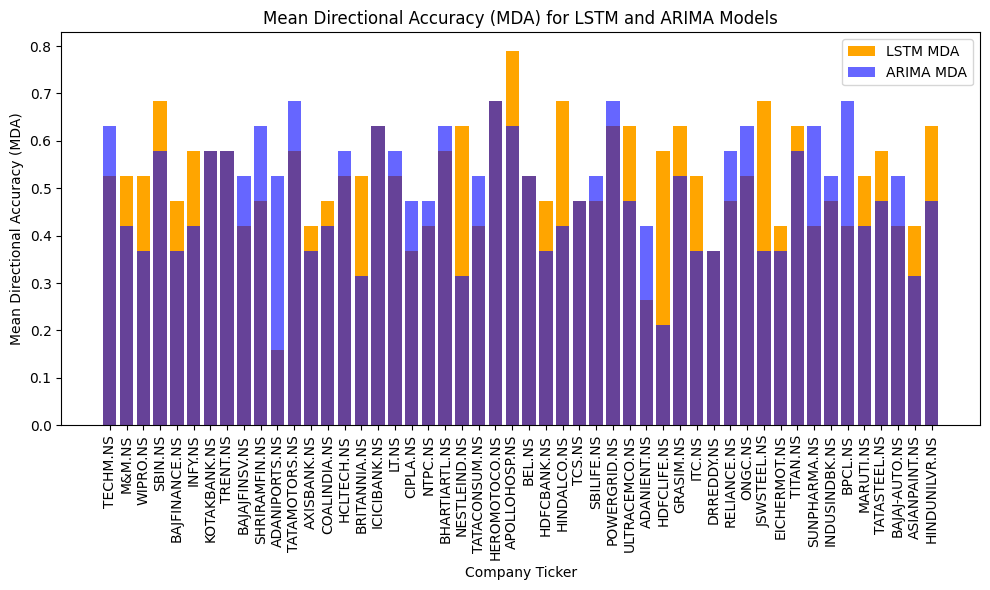

In [ ]:
# Plot and save each indicator separately
# Plot MDA
plt.figure(figsize=(10, 6))
plt.bar(ticker, mda_lstm, color='orange', label='LSTM MDA')
plt.bar(ticker, mda_arima, color='blue', alpha=0.6, label='ARIMA MDA')
plt.xlabel('Company Ticker')
plt.ylabel('Mean Directional Accuracy (MDA)')
plt.title('Mean Directional Accuracy (MDA) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/MDA.png', format='png', dpi=300)

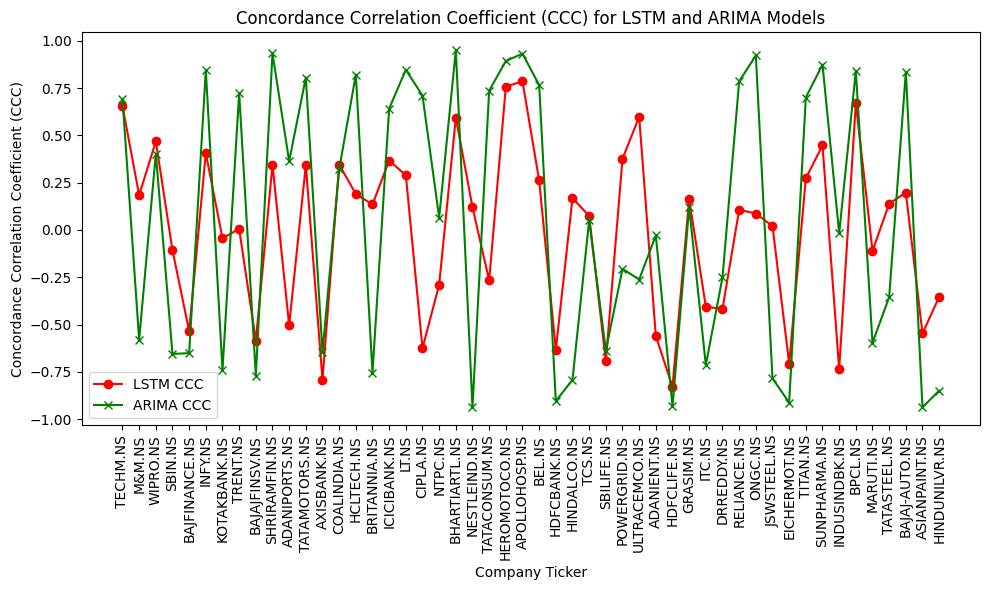

In [ ]:
# Plot CCC
plt.figure(figsize=(10, 6))
plt.plot(ticker, ccc_lstm, marker='o', color='red', label='LSTM CCC')
plt.plot(ticker, ccc_arima, marker='x', color='green', label='ARIMA CCC')
plt.xlabel('Company Ticker')
plt.ylabel('Concordance Correlation Coefficient (CCC)')
plt.title('Concordance Correlation Coefficient (CCC) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/CCC.png', format='png', dpi=300)

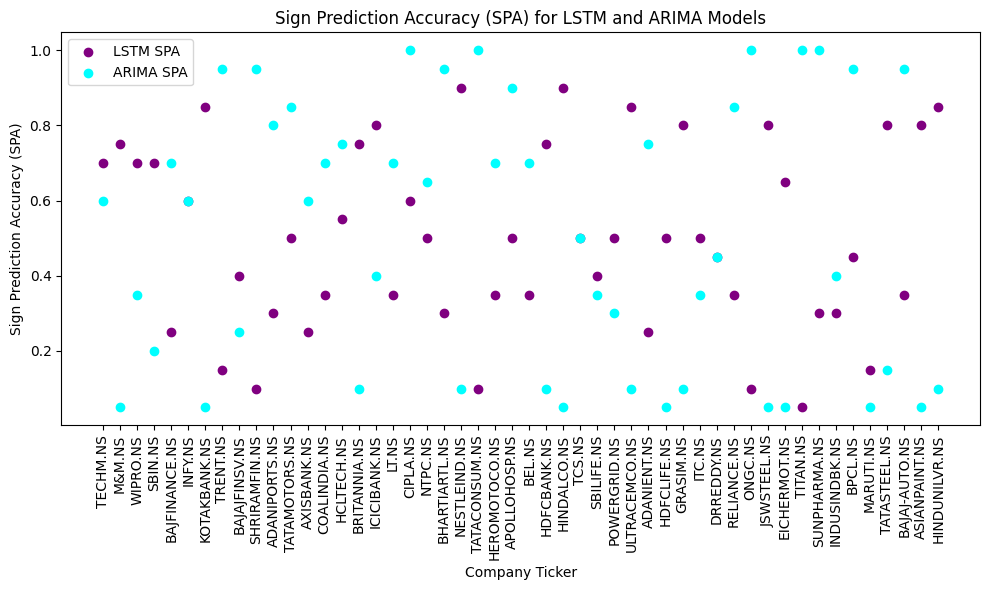

In [ ]:
# Plot SPA
plt.figure(figsize=(10, 6))
plt.scatter(ticker, spa_lstm, color='purple', label='LSTM SPA')
plt.scatter(ticker, spa_arima, color='cyan', label='ARIMA SPA')
plt.xlabel('Company Ticker')
plt.ylabel('Sign Prediction Accuracy (SPA)')
plt.title('Sign Prediction Accuracy (SPA) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/SPA.png', format='png', dpi=300)

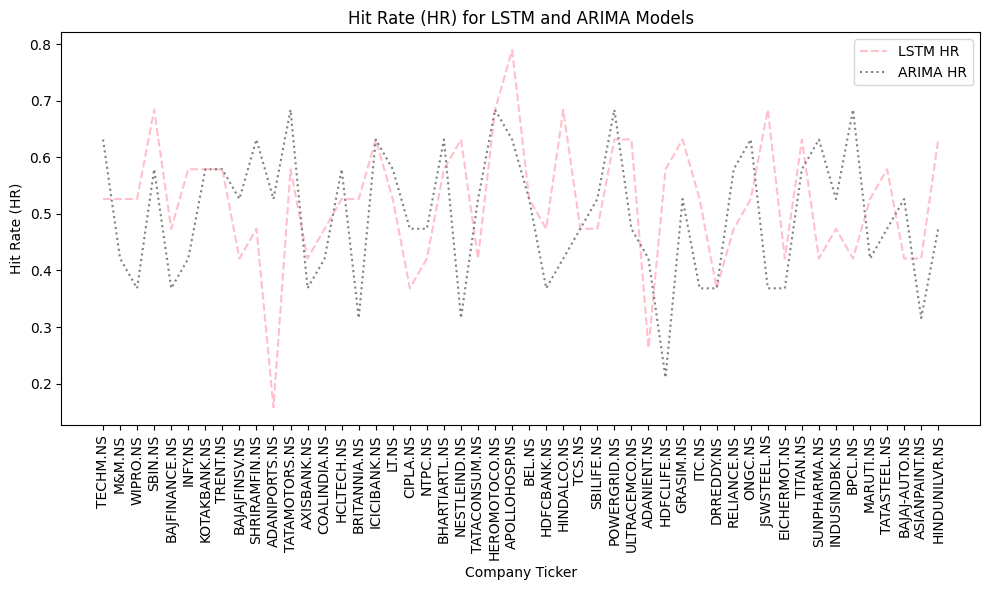

In [ ]:
# Plot HR
plt.figure(figsize=(10, 6))
plt.plot(ticker, hr_lstm, linestyle='--', color='pink', label='LSTM HR')
plt.plot(ticker, hr_arima, linestyle=':', color='gray', label='ARIMA HR')
plt.xlabel('Company Ticker')
plt.ylabel('Hit Rate (HR)')
plt.title('Hit Rate (HR) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/HR.png', format='png', dpi=300)

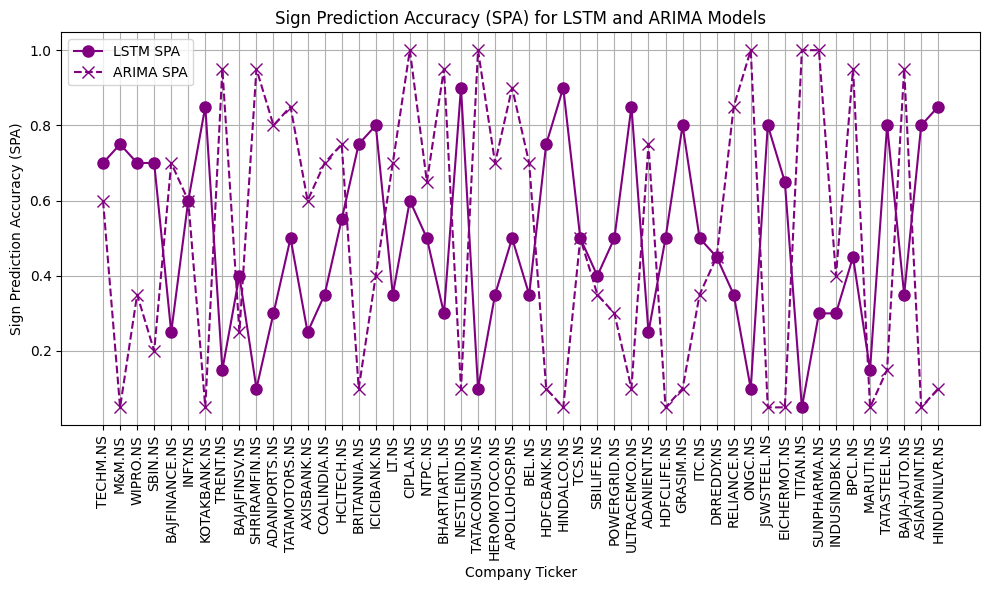

In [ ]:
# Plot SPA with a line plot for better readability
plt.figure(figsize=(10, 6))
plt.plot(ticker, spa_lstm, marker='o', color='purple', label='LSTM SPA', linestyle='-', markersize=8)
plt.plot(ticker, spa_arima, marker='x', color='purple', label='ARIMA SPA', linestyle='--', markersize=8)
plt.xlabel('Company Ticker')
plt.ylabel('Sign Prediction Accuracy (SPA)')
plt.title('Sign Prediction Accuracy (SPA) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)  # Adding grid lines for better readability
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/SPA.png', format='png', dpi=300)

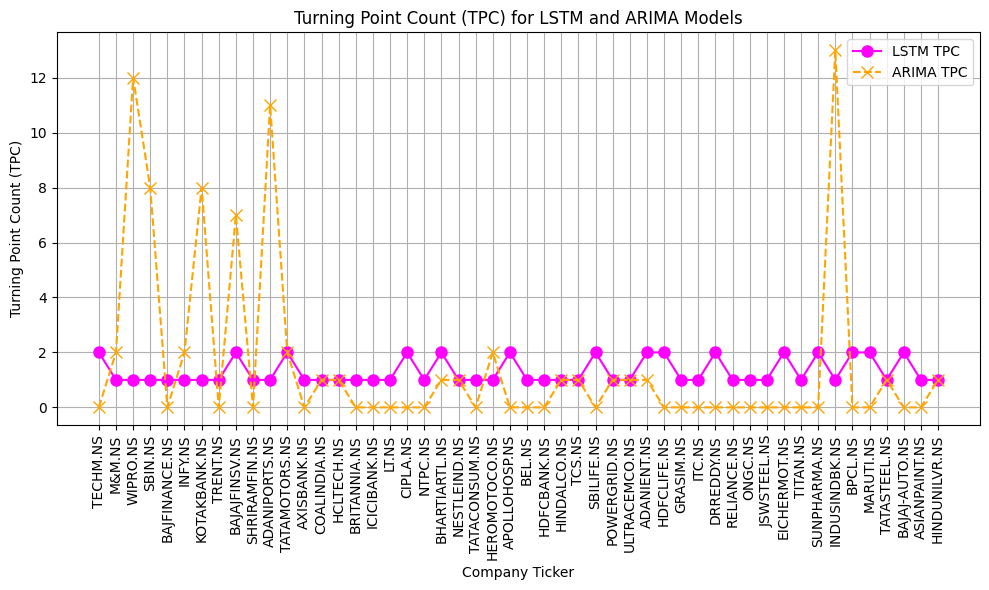

In [ ]:
# Plot TPC
plt.figure(figsize=(10, 6))
plt.plot(ticker, tpc_lstm, marker='o', color='magenta', label='LSTM TPC', linestyle='-', markersize=8)
plt.plot(ticker, tpc_arima, marker='x', color='orange', label='ARIMA TPC', linestyle='--', markersize=8)
plt.xlabel('Company Ticker')
plt.ylabel('Turning Point Count (TPC)')
plt.title('Turning Point Count (TPC) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/TPC.png', format='png', dpi=300)


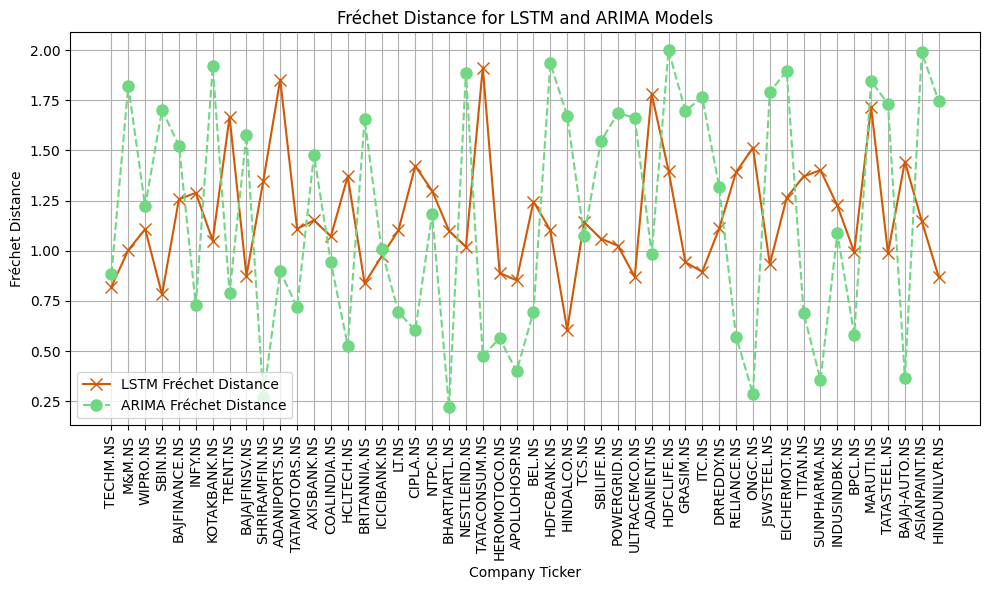

In [ ]:
# Plot Fréchet Distance
plt.figure(figsize=(10, 6))
plt.plot(ticker, frechet_lstm, marker='x', color='#d15804', label='LSTM Fréchet Distance', linestyle='-', markersize=8)
plt.plot(ticker, frechet_arima, marker='o', color='#70d783', label='ARIMA Fréchet Distance', linestyle='--', markersize=8)
plt.xlabel('Company Ticker')
plt.ylabel('Fréchet Distance')
plt.title('Fréchet Distance for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/Frechet_Distance.png', format='png', dpi=300)

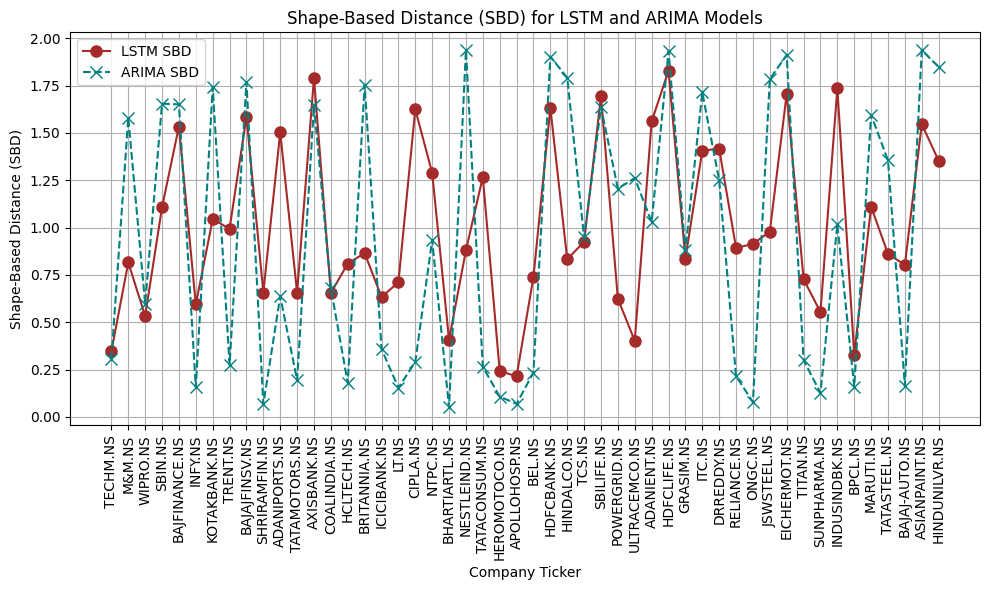

In [ ]:
# Plot Shape-Based Distance (SBD)
plt.figure(figsize=(10, 6))
plt.plot(ticker, sbd_lstm, marker='o', color='brown', label='LSTM SBD', linestyle='-', markersize=8)
plt.plot(ticker, sbd_arima, marker='x', color='teal', label='ARIMA SBD', linestyle='--', markersize=8)
plt.xlabel('Company Ticker')
plt.ylabel('Shape-Based Distance (SBD)')
plt.title('Shape-Based Distance (SBD) for LSTM and ARIMA Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/Shape_Based_Distance.png', format='png', dpi=300)